<a href="https://colab.research.google.com/github/RSid8/Softmax/blob/Softmax-edits/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import math

In [0]:
def load_planar_dataset():

 data= sio.loadmat('ex4data1.mat')
 Y = data['y']
 Y[Y==10] = 0
 Y_train = Y[0:4950,:]
 Y_test_orig = Y[4950:4999,:]
 X= data['X']
 X[X==10] = 0
 X_train = X[0:4950,:]
 X_test_orig = X[4950:4999,:]
 return X_train, Y_train, X_test_orig, Y_test_orig


In [0]:
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [92]:
X_train, Y_train , X_test_orig, Y_test_orig  = load_planar_dataset()
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test_orig.shape))
print ("Y_test shape: " + str(Y_test_orig.shape))


X_train shape: (4950, 400)
Y_train shape: (4950, 1)
X_test shape: (49, 400)
Y_test shape: (49, 1)


AttributeError: ignored

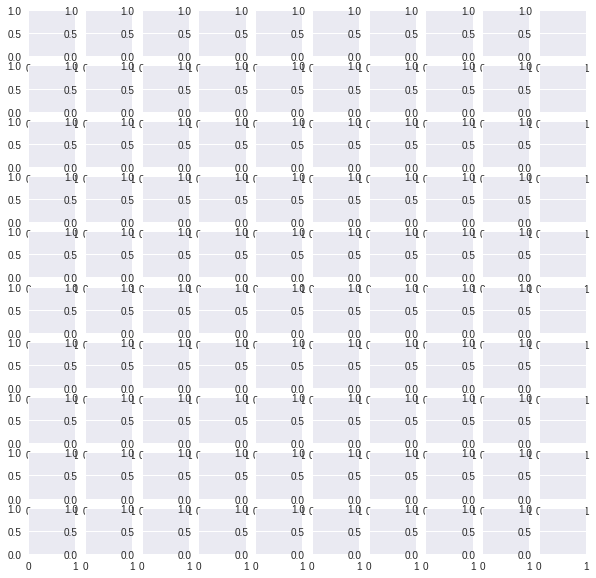

In [93]:
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
       axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
reshape((20,20), order = 'F'))          
       axarr[i,j].axis('off')




In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


In [95]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

Y_train = convert_to_one_hot(Y_train, 10)
Y_test = convert_to_one_hot(Y_test_orig, 10)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 4950
number of test examples = 49
X_train shape: (400, 4950)
Y_train shape: (10, 4950)
X_test shape: (400, 49)
Y_test shape: (10, 49)


In [0]:
def create_placeholders(n_x, n_y):
  X = tf.placeholder(tf.float32, [n_x, None], name = "X")
  Y = tf.placeholder(tf.float32, [n_y, None], name = "Y")
  return X, Y

In [97]:
X, Y = create_placeholders(400, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_1:0", shape=(400, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(10, ?), dtype=float32)


In [0]:
 def initialize_parameters():   
  
  
    W1 = tf.get_variable("W1", [25,400], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [10,25], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [10,1], initializer = tf.zeros_initializer())
                         
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters                        

In [0]:
def forward_propagation(X, parameters):
   #call parameters
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = tf.add(tf.matmul(W1,X), b1)                                           # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                         # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1), b2) 
    
    return Z2
    
    
  

In [0]:
def compute_cost(Z2, Y):
  # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z2)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [0]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [0]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []
    ops.reset_default_graph() 
    
    X, Y = create_placeholders(n_x,n_y)
    
    parameters = initialize_parameters()
    
    Z2 = forward_propagation(X, parameters)
    
    cost = compute_cost(Z2, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
      
      sess.run(init)
      
      for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)
            
            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
               
                
                epoch_cost += minibatch_cost / num_minibatches

            
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
      plt.plot(np.squeeze(costs))
      plt.ylabel('cost')
      plt.xlabel('iterations (per tens)')
      plt.title("Learning rate =" + str(learning_rate))
      plt.show()
      
      parameters = sess.run(parameters)
      print ("Parameters have been trained!")
        
      correct_prediction = tf.equal(tf.argmax(Z2), tf.argmax(Y))  
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
      
      print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
      print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
      
      return parameters

Cost after epoch 0: 2.316589
Cost after epoch 100: 1.556172
Cost after epoch 200: 1.005029
Cost after epoch 300: 0.751816
Cost after epoch 400: 0.608613
Cost after epoch 500: 0.516741
Cost after epoch 600: 0.457911
Cost after epoch 700: 0.414290
Cost after epoch 800: 0.383904
Cost after epoch 900: 0.360084
Cost after epoch 1000: 0.342129
Cost after epoch 1100: 0.327500
Cost after epoch 1200: 0.314380
Cost after epoch 1300: 0.303417
Cost after epoch 1400: 0.294229


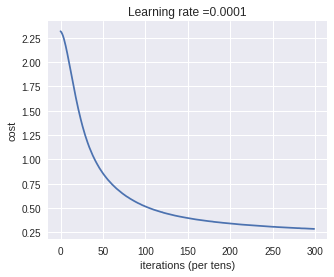

Parameters have been trained!
Train Accuracy: 0.9218182
Test Accuracy: 0.97959185


In [103]:
parameters = model(X_train, Y_train, X_test, Y_test)